# MAKE GRID - NOTEBOOK VERSION

In [21]:
#Allows widget interactivity with user
%matplotlib widget  
%load_ext autoreload
%autoreload 2

import numpy as np
import os,sys
os.environ['ETS_TOOLKIT'] = 'wx'
sys.path.append("./Modules/")
sys.path.append("./Readers/")
sys.path.append("./Modules/graphicUI_tools/")
from main_window import *
import tools_make_grid
#----------------------------------------------#
from tools_make_grid import inputs,inputs_smth,EasyGrid,GetMask,GetTopo
from croco_class import CROCO
from main_window import Outputs
#----------------------------------------------#
from scipy.spatial import distance
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact_manual
#----------------------------------------------#
from matplotlib.widgets import RectangleSelector
from ipywidgets import FloatText, VBox
from IPython.display import display    
 
#from Modules.map_tools.map_tools import plot_grid, plot_outline, plot_topo

[autoreload of make_grid failed: Traceback (most recent call last):
  File "/home/thibault-delahaye/micromamba/envs/croco_pyenv/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/home/thibault-delahaye/micromamba/envs/croco_pyenv/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/home/thibault-delahaye/micromamba/envs/croco_pyenv/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 846, in exec_module
  File "<frozen importlib._bootstrap_external>", line 983, in get_code
  File "<frozen importlib._bootstrap_external>", line 913, in source_to_code
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/home/thibault-delahaye/git_dev/notebook-grid-to

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## ✏️🔧 User's changes

In [3]:
from tools_grid_inputs import setup_widgets

# Call the setup_widgets function to display the widgets and get the function to retrieve saved values
get_saved_config = setup_widgets()

## 🧩🌐 Building the grid

In [5]:
from tools_create_grids import create_classic_grid

# Use get_saved_config to access the saved values after clicking the save button
saved_config = get_saved_config()

# Create the grid and saves it in "outputs"
grid= create_classic_grid(tra_lon, tra_lat, size_x, size_y, nx, ny, rot, hmin, hmax, interp_rad, rfact, saved_config['smooth_meth'], topofile, shp_file, sgl_connect, output_file)


Reading topography file: ../../DATASETS_CROCOTOOLS/Topo/etopo2.nc
Single region dataset imin/imax= 5534 6165
Bounding indices of the relevant part to be extracted from the entire dataset:
 imin,imax = 5534 6165 out of 10800 jmin,jmax = 1528 1963 out of 5400
Interpolating topography to CROCO grid

 Geographical extents of the dataset:
Finished interpolating
    Longitude min/max =    4.466667   25.500000
    Latitude  min/max =  -39.066666  -24.566668

 Geographical extents of requested ROMS grid:
    Longitude min/max =    4.511359   25.488641
    Latitude  min/max =  -39.031434  -24.631671

 Bounding indices for the portion of dataset covering the entire model grid:
 iwest,ieast =    2   631 out of   632 jsouth,jnorth =    2   434 out of   436

 Averaging window width = 2.00000 in grid spaces.

.........

 Wall Clock time spent to compute hraw    0.03 sec running   1 threads.
 enter smooth_thread r_max = 0.2000000  iters_cond =  500  iters_lin =    0
 set_tiles: nx =  40 ny =  39 numt

##### 💾 Save grid as necdf
This code creates a Netcdf file containing all grid data (geographic, topo-bathymetric, mask) in the format defined by the classes generated earlier in this notebook.   
Then it saves it in the ouput repertory. If you want to edit bathymetry/Mask you can save it later on this notebook.

In [ ]:
CROCO.create_grid_nc(None, output_file, inputs, grid)

## ✏️ Editing the grid's MASK and BATHYMETRY

### Editing bathymetry

#### Cell by cell edition mode

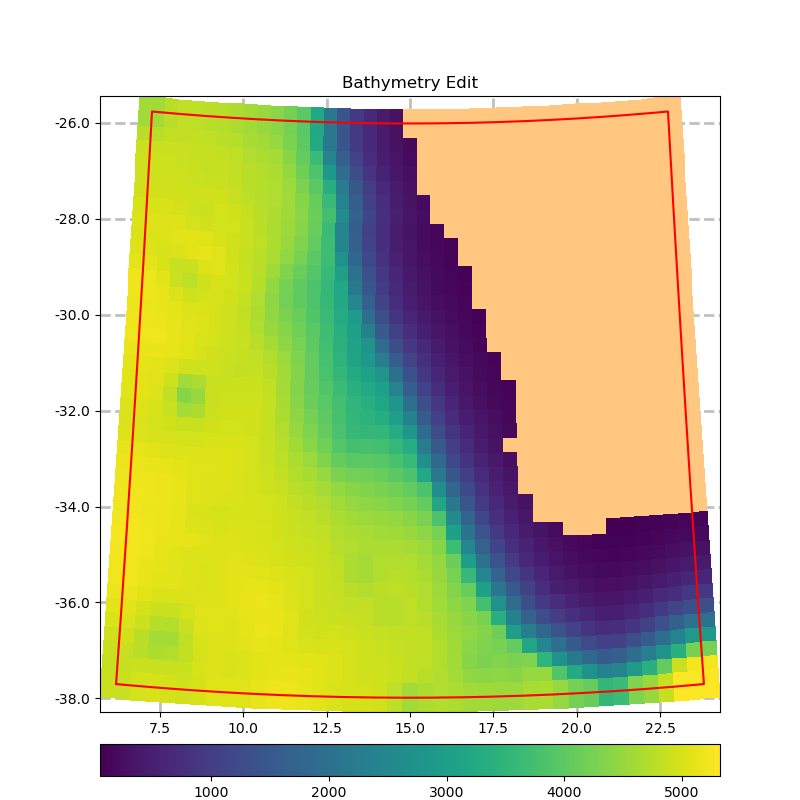

In [9]:
from tools_grid_edition import ValueUpdater
import tools_grid_edition


#Create an instance of the class ValueUpdater
figure_cell_updater= ValueUpdater(grid)

#### Cell by cell edition mode

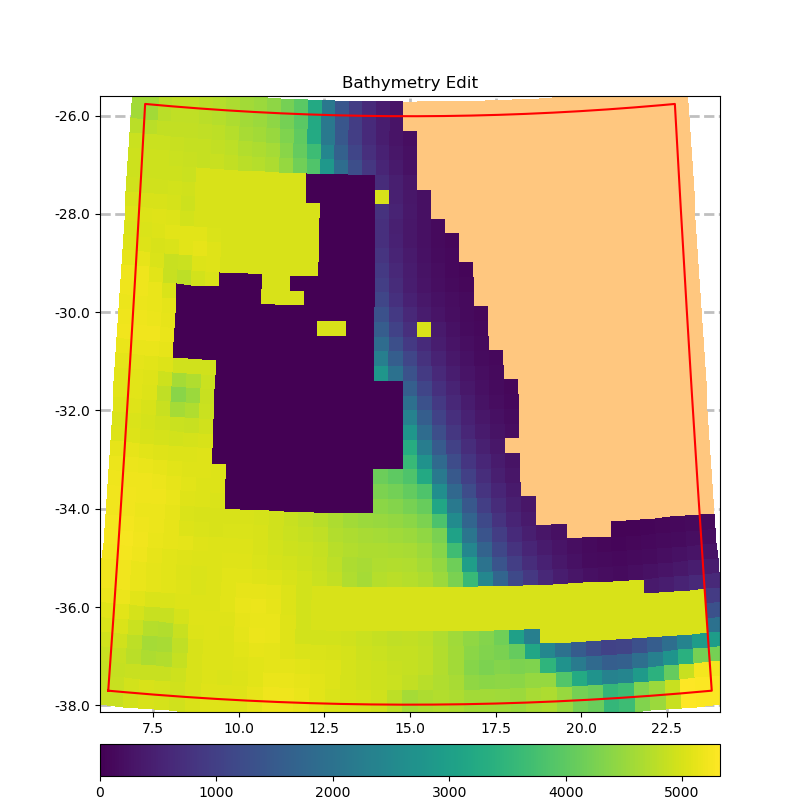

In [20]:
from tools_grid_edition import RectangleSelectorEdition
figure_cell_updater= RectangleSelectorEdition(grid)
import tools_grid_edition

##### 💾 Save grid as necdf
This code creates a Netcdf file containing all grid data (geographic, topo-bathymetric, mask) in the format defined by the classes generated earlier in this notebook.   
Then it saves it in the ouput repertory. If you want to edit bathymetry/Mask you can save it later on this notebook.

In [ ]:
CROCO.create_grid_nc(None, output_file, inputs, grid)